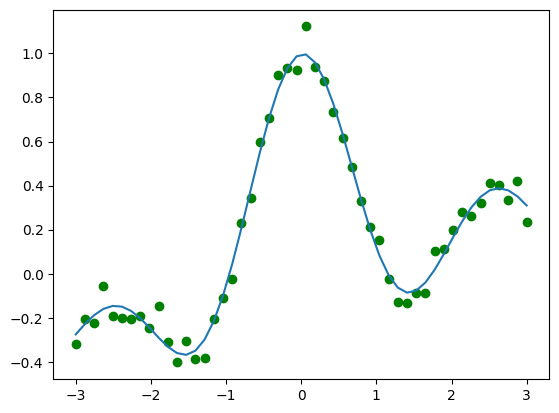

In [39]:
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

#np.random.seed(0)  # set the random seed for reproducibility


def generate_sample(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix = np.pi * x
    target = np.sin(pix) / pix + 0.1 * x
    noise = 0.05 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise


def calc_design_matrix(x, h):
    return np.exp(-(x[None] - x[:, None]) ** 2 / (2 * h ** 2))

def IRLS(phi, y, lamda, max_iter=1000, tol=1e-4):
    n = phi.shape[1]

    # Initialize theta by regularized ridge regression
    theta = theta_prev = np.linalg.solve(phi.T.dot(phi) + 1e-4 * np.identity(n), phi.T.dot(y))
    
    # Iteratively update theta until convergence
    for _ in range(max_iter):
        # Theta
        Theta = np.diag(np.abs(theta))

        # Update theta
        theta = np.linalg.inv(np.dot(phi.T, phi) + lamda * np.linalg.pinv(Theta)).dot(phi.T).dot(y)
        
        # Check for convergence
        if np.linalg.norm(theta - theta_prev) < tol:
            break

        theta_prev = theta
    return theta




# create sample
sample_size = 50
xmin, xmax = -3, 3
x, y = generate_sample(xmin=xmin, xmax=xmax, sample_size=sample_size)
h = 1

# calculate design matrix
phi = calc_design_matrix(x, h)

# solve the least square problem by IRLS
theta = IRLS(phi, y, lamda=0.005)

# create data to visualize the prediction
X = np.linspace(start=xmin, stop=xmax, num=50)
Phi = calc_design_matrix(X, h)
prediction = Phi.dot(theta)

# visualization
plt.clf()
plt.scatter(x, y, c='green', marker='o')
plt.plot(X, prediction)
plt.savefig('ADA3-1.png')
